In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
# import data
Electricity_Consum=pd.read_csv('Electricity Consumption.csv')

In [3]:
Electricity_Consum.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
Electricity_Consum.shape

(561, 2)

In [5]:
#check duplicates
Electricity_Consum.duplicated().sum()

0

In [6]:
Electricity_Consum.isnull().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [7]:
Electricity_Consum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [8]:
Electricity_Consum['DATE'] = pd.to_datetime(Electricity_Consum['DATE'])
Electricity_Consum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [9]:
Electricity_Consum.head(4)

,DATE,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416


In [11]:
Electricity_Consum.tail(4)

,DATE,Electricty_Consumption_in_TW
557,2019-06-01,110.8580
558,2019-07-01,122.1014
559,2019-08-01,121.7765
560,2019-09-01,109.7190


In [12]:
dt_df = pd.date_range(start='1973-01-01',end='2019-10-01',freq='M')
dt_df = pd.DataFrame(dt_df,columns=['date'])

In [13]:
dt_df.shape

(561, 1)

In [14]:
dt_df

,date
0,1973-01-31
1,1973-02-28
2,1973-03-31
3,1973-04-30
4,1973-05-31
...,...
556,2019-05-31
557,2019-06-30
558,2019-07-31
559,2019-08-31


In [16]:
def get_date(x):
    d = str(x).split('-')[:-1]
    d.append('01')
    final_dt = '-'.join(d)
    return final_dt

In [17]:
dt_df['date'] = dt_df['date'].apply(lambda x: get_date(x))

In [18]:
dt_df.head(4)

,date
0,1973-01-01
1,1973-02-01
2,1973-03-01
3,1973-04-01


In [19]:
dt_df.tail(4)

,date
557,2019-06-01
558,2019-07-01
559,2019-08-01
560,2019-09-01


In [21]:
dt_df['date'] = pd.to_datetime(dt_df['date'])
dt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    561 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.5 KB


In [22]:
Electricity_Consum.shape,dt_df.shape

((561, 2), (561, 1))

In [24]:
merged_df = dt_df.merge(Electricity_Consum,left_on=['date'],right_on=['DATE'],how='left')

In [25]:
merged_df

,date,DATE,Electricty_Consumption_in_TW
0,1973-01-01,1973-01-01,35.9728
1,1973-02-01,1973-02-01,36.1334
2,1973-03-01,1973-03-01,35.0625
3,1973-04-01,1973-04-01,33.8416
4,1973-05-01,1973-05-01,33.5107
...,...,...,...
556,2019-05-01,2019-05-01,97.5860
557,2019-06-01,2019-06-01,110.8580
558,2019-07-01,2019-07-01,122.1014
559,2019-08-01,2019-08-01,121.7765


In [26]:
merged_df.isnull().sum()

date                            0
DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [27]:
final_df = merged_df[['date','Electricty_Consumption_in_TW']]

In [28]:
final_df

,date,Electricty_Consumption_in_TW
0,1973-01-01,35.9728
1,1973-02-01,36.1334
2,1973-03-01,35.0625
3,1973-04-01,33.8416
4,1973-05-01,33.5107
...,...,...
556,2019-05-01,97.5860
557,2019-06-01,110.8580
558,2019-07-01,122.1014
559,2019-08-01,121.7765


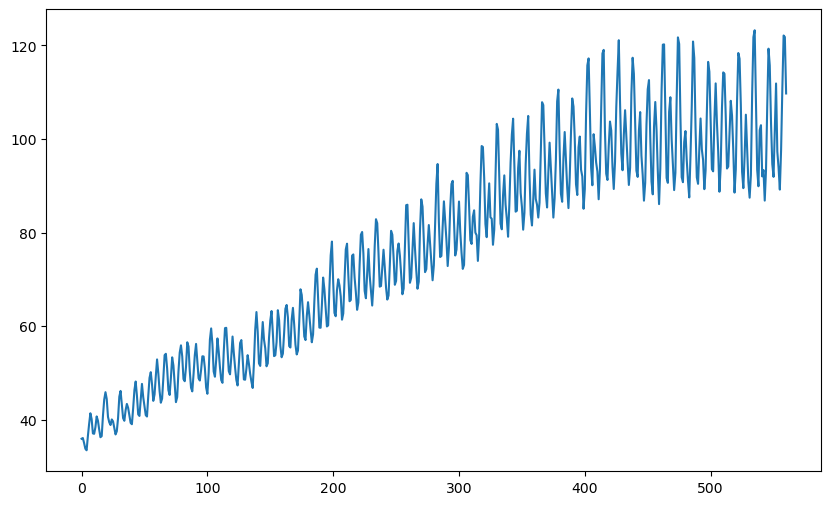

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['Electricty_Consumption_in_TW'])

In [30]:
final_df['year'] = final_df['date'].dt.year

In [31]:
final_df

,date,Electricty_Consumption_in_TW,year
0,1973-01-01,35.9728,1973
1,1973-02-01,36.1334,1973
2,1973-03-01,35.0625,1973
3,1973-04-01,33.8416,1973
4,1973-05-01,33.5107,1973
...,...,...,...
556,2019-05-01,97.5860,2019
557,2019-06-01,110.8580,2019
558,2019-07-01,122.1014,2019
559,2019-08-01,121.7765,2019


In [32]:
final_df.columns

Index(['date', 'Electricty_Consumption_in_TW', 'year'], dtype='object')

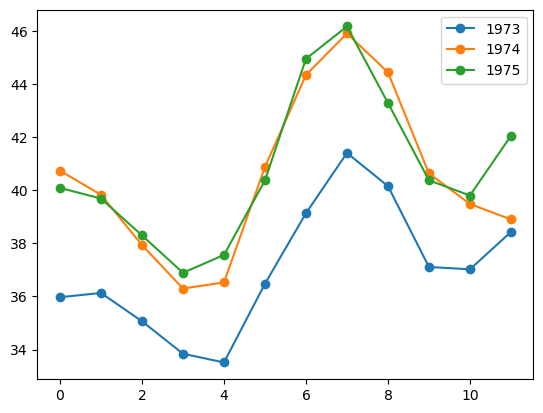

In [33]:
plt.plot(final_df[final_df['year']==1973]['Electricty_Consumption_in_TW'].values,label='1973',marker='o')
plt.plot(final_df[final_df['year']==1974]['Electricty_Consumption_in_TW'].values,label='1974',marker='o')
plt.plot(final_df[final_df['year']==1975]['Electricty_Consumption_in_TW'].values,label='1975',marker='o')
plt.legend()
plt.show()

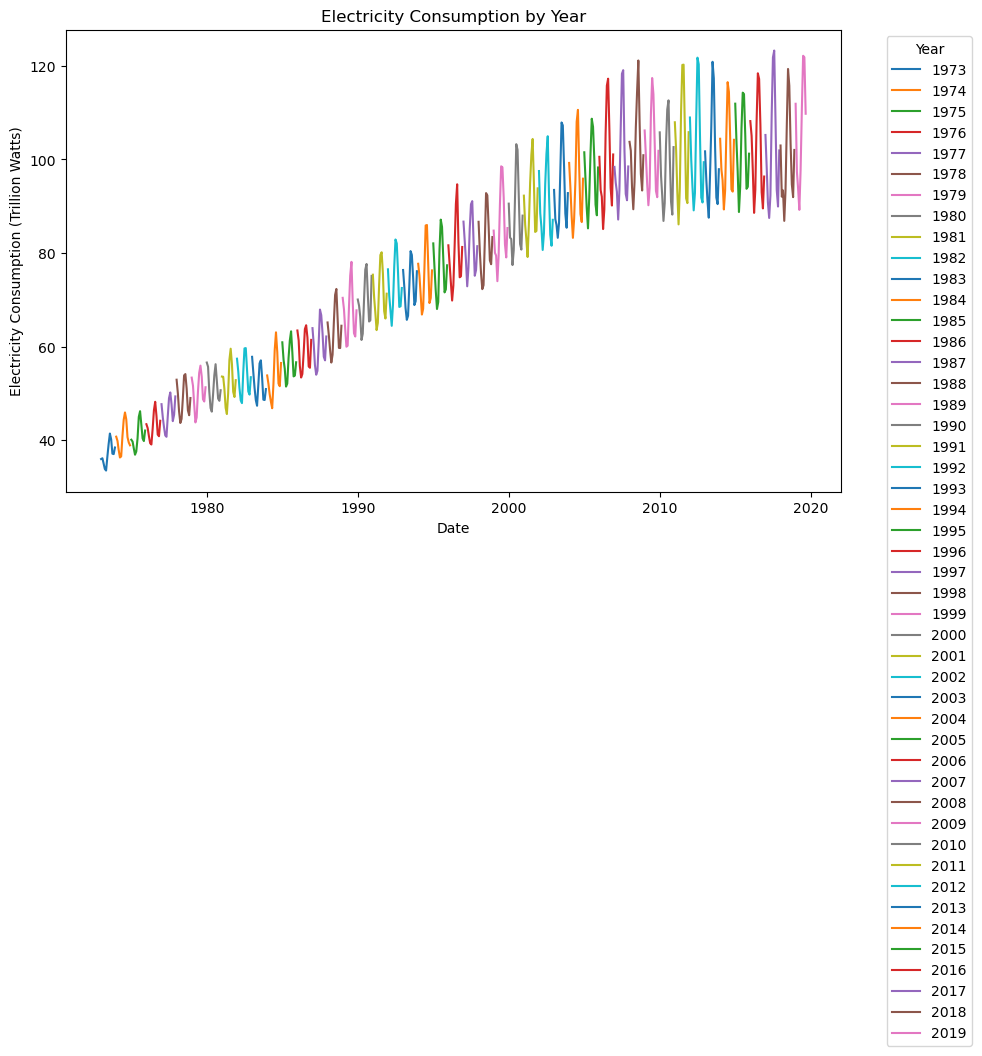

In [34]:
import matplotlib.pyplot as plt

# Group data by year
grouped_data = final_df.groupby('year')

# Plot electricity consumption for each year
plt.figure(figsize=(10, 6))
for year, group in grouped_data:
    plt.plot(group['date'], group['Electricty_Consumption_in_TW'], label=str(year))

plt.title('Electricity Consumption by Year')
plt.xlabel('Date')
plt.ylabel('Electricity Consumption (Trillion Watts)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Implementing Augmented Dicky Fuller Test

In [35]:
datapoints = adfuller(final_df['Electricty_Consumption_in_TW'])

In [36]:
datapoints

(-1.7405933729832554,
 0.41032816044686227,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [37]:
labels = ['test_parameters','p-value','lags-used','dataobs']

In [38]:
d = dict(zip(labels,datapoints[:4]))
d

{'test_parameters': -1.7405933729832554,
 'p-value': 0.41032816044686227,
 'lags-used': 15,
 'dataobs': 545}

In [39]:
if(d['p-value']>0.05):
    print("Accept the Null Hypothesis")
    print("The time series is non-stationary in nature")
else:
    print("Reject the null hypothesis")
    print("The time series is stationary in nature")

Accept the Null Hypothesis
The time series is non-stationary in nature


# ARIMA MODEL

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [41]:
# IN ARIMA WE HAVE GIVE P,D,Q VALUE THERE WE CALUCULATE P,Q VALUE BY PLOTING PARTIAL AUTOCOLREALTION AND CO-RELATON

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sn

In [43]:
train_s = final_df.iloc[:561]
test_s = final_df.iloc[500:]
train_s.shape, test_s.shape

((561, 3), (61, 3))

In [44]:
# PLOTTING PARTIAL AUTO CO RELATION

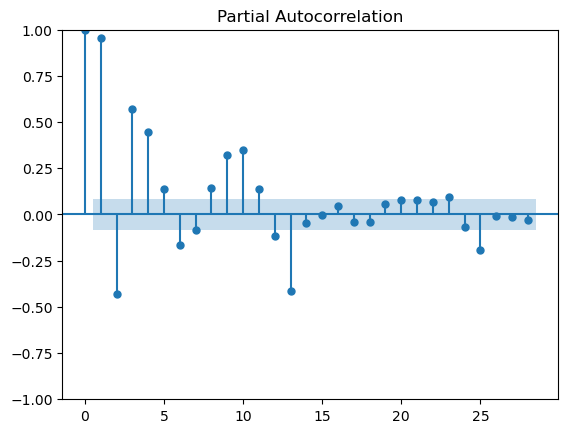

In [45]:
fig = sn.graphics.tsa.plot_pacf(train_s['Electricty_Consumption_in_TW'])

In [46]:
# PLOTTING AUTO CO RELATION

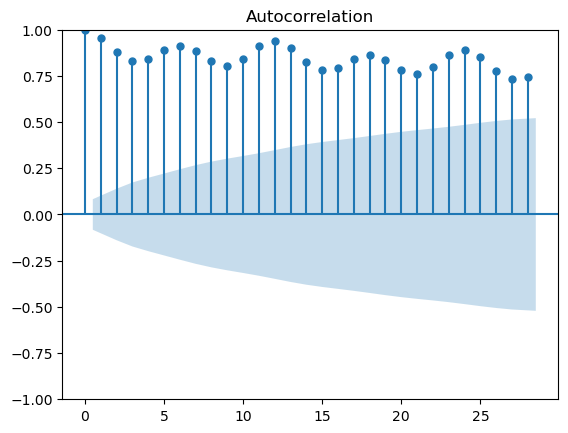

In [47]:
fig = sn.graphics.tsa.plot_acf(train_s['Electricty_Consumption_in_TW'])

In [48]:
# TRAIN THE ARIMA MODEL

In [49]:
arima = ARIMA(train_s['Electricty_Consumption_in_TW'],order=(7,0,28))

In [50]:
# FIT THE ARIMA MODEL

In [51]:
model = arima.fit()

C:\Users\manus\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [52]:
# PREDICT THE MODEL

In [53]:
xx = model.predict(start=501, end=561, dynamic=True)

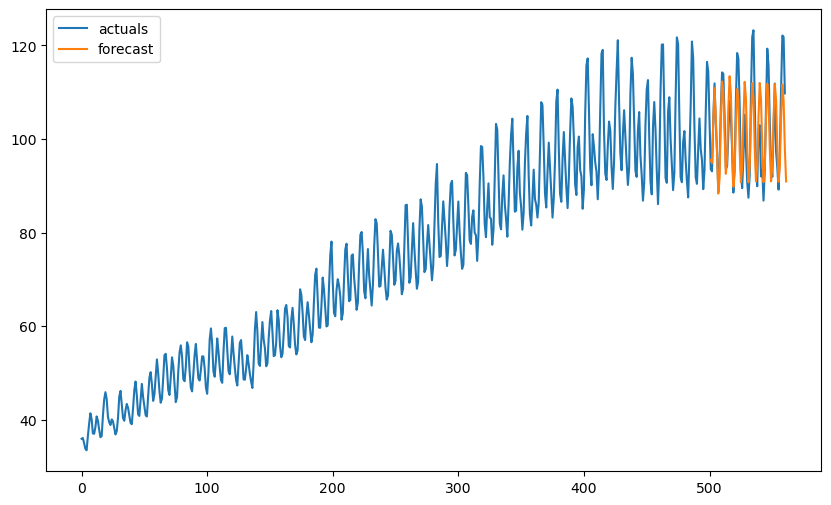

In [54]:
#plotting true and actual value
plt.figure(figsize=(10, 6))
plt.plot(final_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(xx,label='forecast')
plt.legend()
plt.show()

In [55]:
# b. Provide model validation metrics/accuracy metrics

In [56]:
mean_absolute_percentage_error(test_s['Electricty_Consumption_in_TW'],xx)

0.08246235068870583

In [57]:
# forecasting test data on next two year

In [58]:
forecast_ets = model.forecast(steps=24)

In [59]:
forecast_ets

561     99.971740
562     99.376375
563    106.452835
564    113.529805
565    103.679446
566     96.948933
567     88.447985
568     95.305549
569    109.235014
570    118.241010
571    116.786226
572    106.535477
573     98.617584
574     98.917801
575    108.828831
576    115.234805
577    108.801928
578     98.675495
579     88.979813
580     94.038922
581    105.755474
582    114.478608
583    113.558724
584    102.171603
Name: predicted_mean, dtype: float64

In [60]:
# c. Provide demand estimation for next 1-2 years on monthly basis

In [61]:
#forcasting next two year by plotting graph

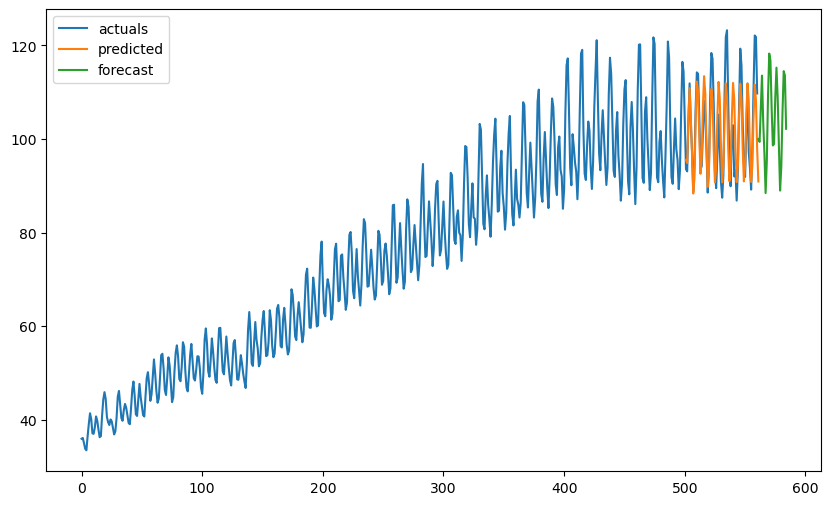

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(xx,label='predicted')
plt.plot(forecast_ets,label='forecast')
plt.legend()
plt.show()

# sarima model

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [64]:
model_sarima = SARIMAX(train_s['Electricty_Consumption_in_TW'], order=(1,1,1), seasonal_order=(1, 1, 1, 12))
sarima_result = model_sarima.fit()

In [65]:
xy = model.predict(start=501, end= 561 ,dynamic=True)

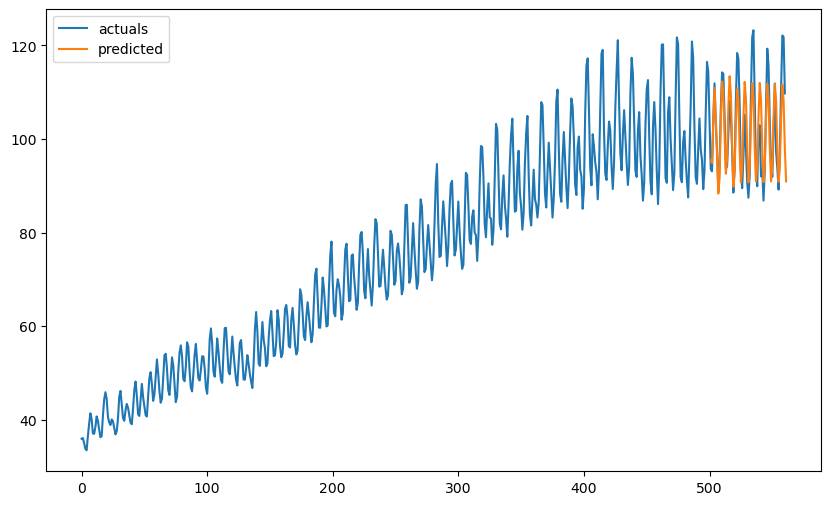

In [66]:
#plotting true and actual value
plt.figure(figsize=(10, 6))
plt.plot(final_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(xy,label='predicted')
plt.legend()
plt.show()

In [67]:
# b. Provide model validation metrics/accuracy metrics

In [68]:
mean_absolute_percentage_error(test_s['Electricty_Consumption_in_TW'],xy)

0.08246235068870583

In [69]:
# forecasting next two year on sarima model

In [70]:
forecast_ets_sarima =sarima_result.forecast(steps=24)

In [71]:
forecast_ets_sarima

561     97.040946
562     93.994580
563    103.302705
564    109.735017
565     99.555647
566     95.672665
567     89.961322
568     96.434415
569    110.387782
570    121.539389
571    120.587586
572    108.421154
573     96.348876
574     93.783510
575    103.358734
576    109.805844
577     99.963671
578     96.132436
579     90.411761
580     96.814490
581    110.819329
582    121.976696
583    120.999501
584    108.831506
Name: predicted_mean, dtype: float64

In [72]:
# c. Provide demand estimation for next 1-2 years on monthly basis

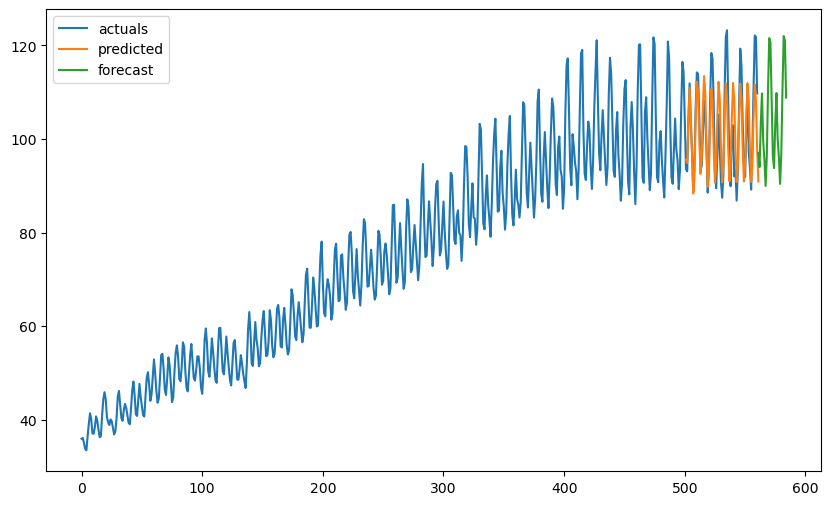

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(xy,label='predicted')
plt.plot(forecast_ets_sarima,label='forecast')
plt.legend()
plt.show()

# ExponentialSmoothing model

In [74]:
model_ets = ExponentialSmoothing(train_s['Electricty_Consumption_in_TW'], trend='add', seasonal='add', seasonal_periods=12)
ets_result = model_ets.fit()


In [75]:
ex_prediction = model.predict(start=501 , end= 561 ,dynamic=True)

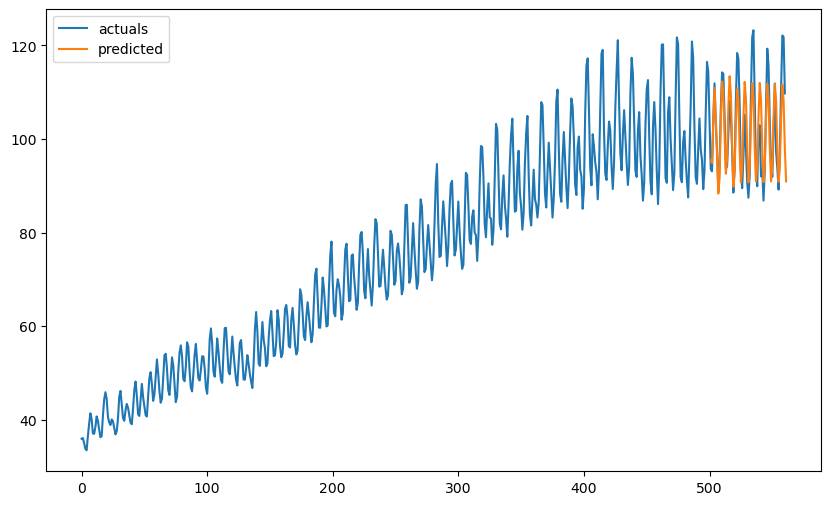

In [76]:
#plotting true and actual value
plt.figure(figsize=(10, 6))
plt.plot(final_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(ex_prediction,label='predicted')
plt.legend()
plt.show()

In [77]:
# b. Provide model validation metrics/accuracy metrics
# Mean Absolute Percentage Error (MAPE)

In [78]:
mean_absolute_percentage_error(test_s['Electricty_Consumption_in_TW'],ex_prediction)

0.08246235068870583

In [79]:
# forecasting next two year data using exponential Smoothing model 

In [80]:
forecast_ets_exp = ets_result.forecast(steps=24)

In [81]:
forecast_ets_exp

561     97.674956
562     95.153668
563    105.335391
564    112.139567
565    101.999583
566     99.609346
567     93.946950
568    100.146845
569    113.701140
570    124.770353
571    123.433489
572    110.834218
573     99.195002
574     96.673715
575    106.855437
576    113.659613
577    103.519629
578    101.129393
579     95.466996
580    101.666892
581    115.221186
582    126.290399
583    124.953535
584    112.354265
dtype: float64

In [82]:
# c. Provide demand estimation for next 1-2 years on monthly basis

In [83]:
#forcasting two year data on exponential smoothning data by using graphs

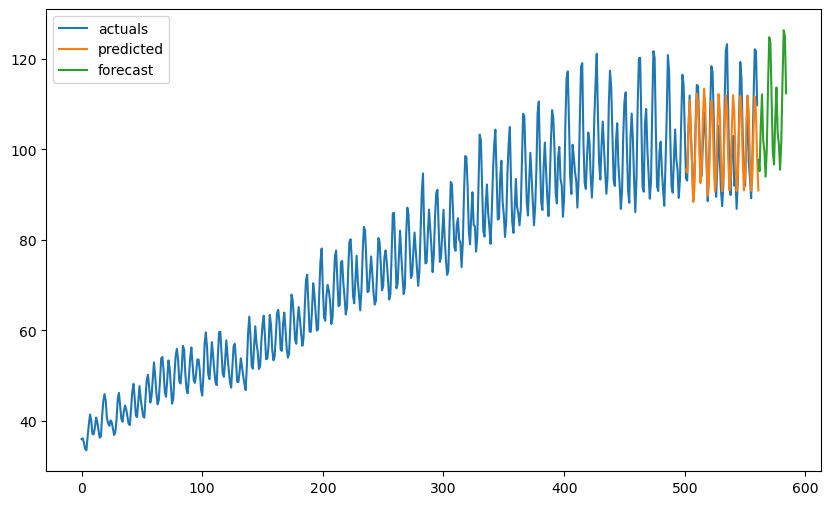

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(final_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(ex_prediction,label='predicted')
plt.plot(forecast_ets_exp,label='forecast')
plt.legend()
plt.show()

In [85]:
# d. Provide which model you selected and reason for selectioN  

In [86]:
# "We selected the SARIMA model for forecasting electricity consumption due to its superior performance and error of 8%
#in terms of accuracy metrics Mape compared to the Exponential Smoothing model.
#Although SARIMA models require more expertise in parameter tuning and may be less interpretable for non-experts
#they offer better flexibility in capturing complex patterns and seasonality present in the electricity consumption data.

# PROPHET 

In [90]:
pip install prophet


  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e0/e2/2ff5e8e06734c1f6f3933274d1eed1ea9e0904bf7a795869a417f5d3de41/cmdstanpy-1.2.2-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/4d/c1/9190d856fb2c9ca7e5dabab530289bf66d03c0e379096678c0ee210abf75/holidays-0.47-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/75/06/4df55e1b7b112d183f65db9503bff189e97179b256e1ea450a3c365241e0/importlib_resources-6.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/55/35/076a5ff427a47613581f6bd7acebfa8d49046a1b78132

In [91]:
from prophet import Prophet

In [92]:
train_s = train_s[['date','Electricty_Consumption_in_TW']]
train_s.columns = ['ds','y']

In [93]:
train_s.shape

(561, 2)

In [94]:
prophet_m = Prophet()

In [95]:
prophet_m.fit(train_s)

23:17:45 - cmdstanpy - INFO - Chain [1] start processing
23:17:46 - cmdstanpy - INFO - Chain [1] done processing


In [96]:
forecast_df = pd.DataFrame(test_s['date'])

In [97]:
forecast_df.columns = ['ds']
forecast_df.head()

,ds
500,2014-09-01
501,2014-10-01
502,2014-11-01
503,2014-12-01
504,2015-01-01


In [98]:
forecast_df = prophet_m.predict(forecast_df)

In [99]:
forecast_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-01,101.697358,100.065375,108.891629,101.697358,101.697358,2.812583,2.812583,2.812583,2.812583,2.812583,2.812583,0.0,0.0,0.0,104.509942
1,2014-10-01,101.712052,91.991887,100.713742,101.712052,101.712052,-5.281971,-5.281971,-5.281971,-5.281971,-5.281971,-5.281971,0.0,0.0,0.0,96.430081
2,2014-11-01,101.727235,91.045593,99.603060,101.727235,101.727235,-6.391433,-6.391433,-6.391433,-6.391433,-6.391433,-6.391433,0.0,0.0,0.0,95.335803
3,2014-12-01,101.741929,97.168289,105.962139,101.741929,101.741929,-0.051795,-0.051795,-0.051795,-0.051795,-0.051795,-0.051795,0.0,0.0,0.0,101.690134
4,2015-01-01,101.757112,101.614144,109.792640,101.757112,101.757112,3.921657,3.921657,3.921657,3.921657,3.921657,3.921657,0.0,0.0,0.0,105.678769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2019-05-01,102.531467,91.775653,100.735060,102.531467,102.531467,-6.191007,-6.191007,-6.191007,-6.191007,-6.191007,-6.191007,0.0,0.0,0.0,96.340460
57,2019-06-01,102.546650,101.254458,110.021740,102.546650,102.546650,3.205719,3.205719,3.205719,3.205719,3.205719,3.205719,0.0,0.0,0.0,105.752369
58,2019-07-01,102.561344,108.534639,117.498328,102.561344,102.561344,10.579453,10.579453,10.579453,10.579453,10.579453,10.579453,0.0,0.0,0.0,113.140797
59,2019-08-01,102.576527,108.865087,117.416234,102.576527,102.576527,10.377291,10.377291,10.377291,10.377291,10.377291,10.377291,0.0,0.0,0.0,112.953818


In [100]:
forecast_df = forecast_df[['ds','yhat']]
forecast_df.head()

,ds,yhat
0,2014-09-01,104.509942
1,2014-10-01,96.430081
2,2014-11-01,95.335803
3,2014-12-01,101.690134
4,2015-01-01,105.678769


In [101]:
merged_df = final_df.merge(forecast_df,left_on=['date'],right_on=['ds'],how='outer')

In [102]:
merged_df.head(4)

,date,Electricty_Consumption_in_TW,year,ds,yhat
0,1973-01-01,35.9728,1973,NaT,NaN
1,1973-02-01,36.1334,1973,NaT,NaN
2,1973-03-01,35.0625,1973,NaT,NaN
3,1973-04-01,33.8416,1973,NaT,NaN


In [103]:
merged_df.tail()

,date,Electricty_Consumption_in_TW,year,ds,yhat
556,2019-05-01,97.5860,2019,2019-05-01,96.340460
557,2019-06-01,110.8580,2019,2019-06-01,105.752369
558,2019-07-01,122.1014,2019,2019-07-01,113.140797
559,2019-08-01,121.7765,2019,2019-08-01,112.953818
560,2019-09-01,109.7190,2019,2019-09-01,105.409617


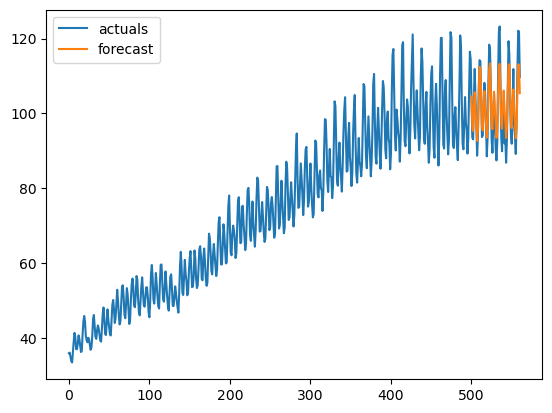

In [104]:
#plotting true and actual value
plt.plot(merged_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(merged_df['yhat'],label='forecast')
plt.legend()
plt.show()

In [105]:
test_s['Electricty_Consumption_in_TW'].shape,merged_df.iloc[-61:]['yhat'].shape

((61,), (61,))

In [106]:
# b. Provide model validation metrics/accuracy metrics

In [107]:
# finding error rate
mean_absolute_percentage_error(test_s['Electricty_Consumption_in_TW'],merged_df.iloc[-61:]['yhat'])

0.03665124277139068

In [108]:
future = prophet_m.make_future_dataframe(periods=24, freq='M')

In [109]:
forecast = prophet_m.predict(future)

In [110]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1973-01-01,37.645537,36.995379,45.501003,37.645537,37.645537,3.679040,3.679040,3.679040,3.679040,3.679040,3.679040,0.0,0.0,0.0,41.324576
1,1973-02-01,37.790850,32.166958,41.062232,37.790850,37.790850,-1.090746,-1.090746,-1.090746,-1.090746,-1.090746,-1.090746,0.0,0.0,0.0,36.700104
2,1973-03-01,37.922101,29.254844,37.643676,37.922101,37.922101,-4.477353,-4.477353,-4.477353,-4.477353,-4.477353,-4.477353,0.0,0.0,0.0,33.444748
3,1973-04-01,38.067414,24.892107,33.330620,38.067414,38.067414,-8.669904,-8.669904,-8.669904,-8.669904,-8.669904,-8.669904,0.0,0.0,0.0,29.397510
4,1973-05-01,38.208040,27.593223,36.426392,38.208040,38.208040,-6.108767,-6.108767,-6.108767,-6.108767,-6.108767,-6.108767,0.0,0.0,0.0,32.099273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,2021-04-30,102.889012,92.375170,100.707731,102.794687,102.999685,-6.230861,-6.230861,-6.230861,-6.230861,-6.230861,-6.230861,0.0,0.0,0.0,96.658151
581,2021-05-31,102.904196,102.486503,111.152635,102.798260,103.023553,3.756419,3.756419,3.756419,3.756419,3.756419,3.756419,0.0,0.0,0.0,106.660615
582,2021-06-30,102.918889,109.407148,118.126581,102.803478,103.048664,10.895638,10.895638,10.895638,10.895638,10.895638,10.895638,0.0,0.0,0.0,113.814527
583,2021-07-31,102.934073,108.104122,116.852059,102.808389,103.072219,9.707206,9.707206,9.707206,9.707206,9.707206,9.707206,0.0,0.0,0.0,112.641279


In [111]:
forecast_next_two_years = forecast[['yhat']].tail(24)

In [112]:
forecast_next_two_years.shape

(24, 1)

In [113]:
# c. Provide demand estimation for next 1-2 years on monthly basis

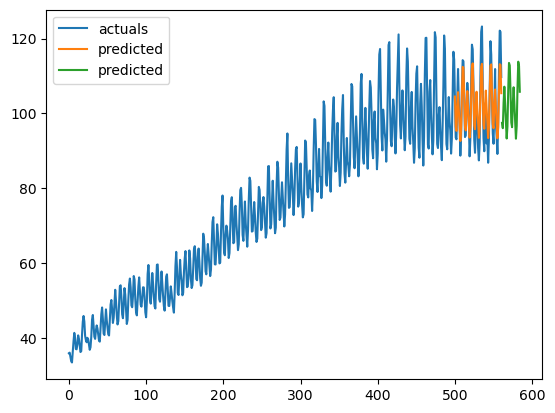

In [114]:
plt.plot(merged_df['Electricty_Consumption_in_TW'],label='actuals')
plt.plot(merged_df['yhat'],label='predicted')
plt.plot(forecast_next_two_years,label='predicted')
plt.legend()
plt.show()

In [115]:
# we not considering prophet the error rate is high

In [116]:
# d. Provide which model you selected and reason for selectioN  

In [109]:
# "We selected the Exponential Smoothing model for forecasting electricity consumption due to its superior performance and error of 8%
#in terms of accuracy metrics Mape compared to the other model ,its capturing trends in the data and predicting welll
#on futher data. Although Exponential Smoothing  models require more expertise in parameter tuning and may be less interpretable for non-experts
#they offer better flexibility in capturing complex patterns and seasonality present in the electricity consumption data.

In [110]:
#--end--